In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importing Dataset

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/UNSW-NB15_1.csv", header=None)
data2 = pd.read_csv("/content/drive/MyDrive/UNSW-NB15_2.csv", header=None)
data3 = pd.read_csv("/content/drive/MyDrive/UNSW-NB15_3.csv", header=None)
data4 = pd.read_csv("/content/drive/MyDrive/UNSW-NB15_4.csv", header=None)

<ipython-input-3-635c04919031>:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("/content/drive/MyDrive/UNSW-NB15_1.csv", header=None)
<ipython-input-3-635c04919031>:2: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("/content/drive/MyDrive/UNSW-NB15_2.csv", header=None)


### Reaasigning Column Name

In [ ]:
# Try reading the file with a different encoding
column_names = pd.read_csv("/content/drive/MyDrive/NUSW-NB15_features.csv", encoding='latin-1')
# Or try 'ISO-8859-1' if 'latin-1' doesn't work
# column_names = pd.read_csv("/content/drive/MyDrive/NUSW-NB15_features.csv", encoding='ISO-8859-1')

column_names

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [ ]:
column_names_list = column_names['Name'].tolist()

In [ ]:
# Concatenate datasets row-wise
final_data = pd.concat([data1, data2, data3, data4], axis=0)
final_data.columns = column_names_list
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2540047 entries, 0 to 440043
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit              fl

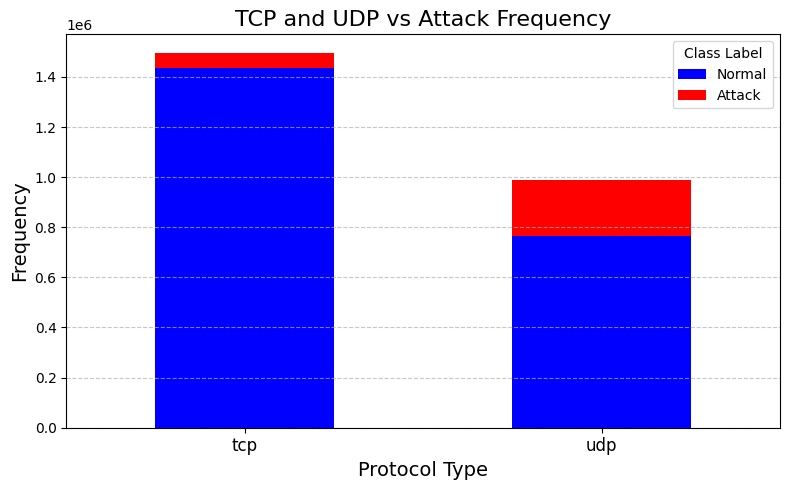

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset (replace this with your actual dataset)
# df = pd.read_csv("your_dataset.csv")

# Filter the dataset to include only TCP and UDP
filtered_df = final_data[final_data['proto'].isin(['tcp', 'udp'])]

# Count occurrences of protocol type for each class label
protocol_vs_attack = pd.crosstab(filtered_df['proto'], filtered_df['Label'])

# Plotting
protocol_vs_attack.plot(kind='bar', figsize=(8, 5), stacked=True, color=['blue', 'red'])
plt.title('TCP and UDP vs Attack Frequency', fontsize=16)
plt.xlabel('Protocol Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Class Label', labels=['Normal', 'Attack'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


#EDA

In [ ]:
print("Shape of the dataset:", final_data.shape)
print("Column Data Types:\n", final_data.dtypes)
print("Missing Values:\n", final_data.isnull().sum())


Shape of the dataset: (2540047, 49)
Column Data Types:
 srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              

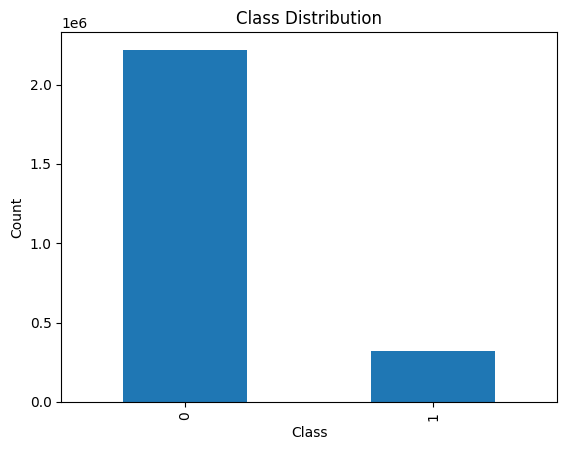

In [ ]:
import matplotlib.pyplot as plt

class_counts = final_data['Label'].value_counts()
class_counts.plot(kind='bar', title='Class Distribution')
plt.xlabel('Attacks')
plt.ylabel('Count')
plt.show()


In [ ]:
# General statistical summary
print("Statistical Summary:\n", final_data.describe())



Statistical Summary:
                 dur        sbytes        dbytes          sttl          dttl  \
count  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06   
mean   6.587916e-01  4.339600e+03  3.642759e+04  6.278197e+01  3.076681e+01   
std    1.392493e+01  5.640599e+04  1.610960e+05  7.462277e+01  4.285089e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.037000e-03  2.000000e+02  1.780000e+02  3.100000e+01  2.900000e+01   
50%    1.586100e-02  1.470000e+03  1.820000e+03  3.100000e+01  2.900000e+01   
75%    2.145545e-01  3.182000e+03  1.489400e+04  3.100000e+01  2.900000e+01   
max    8.786638e+03  1.435577e+07  1.465753e+07  2.550000e+02  2.540000e+02   

              sloss         dloss         Sload         Dload         Spkts  \
count  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06   
mean   5.163921e+00  1.632944e+01  3.695645e+07  2.450861e+06  3.328884e+01   
std    2.251707e+01  5.659474

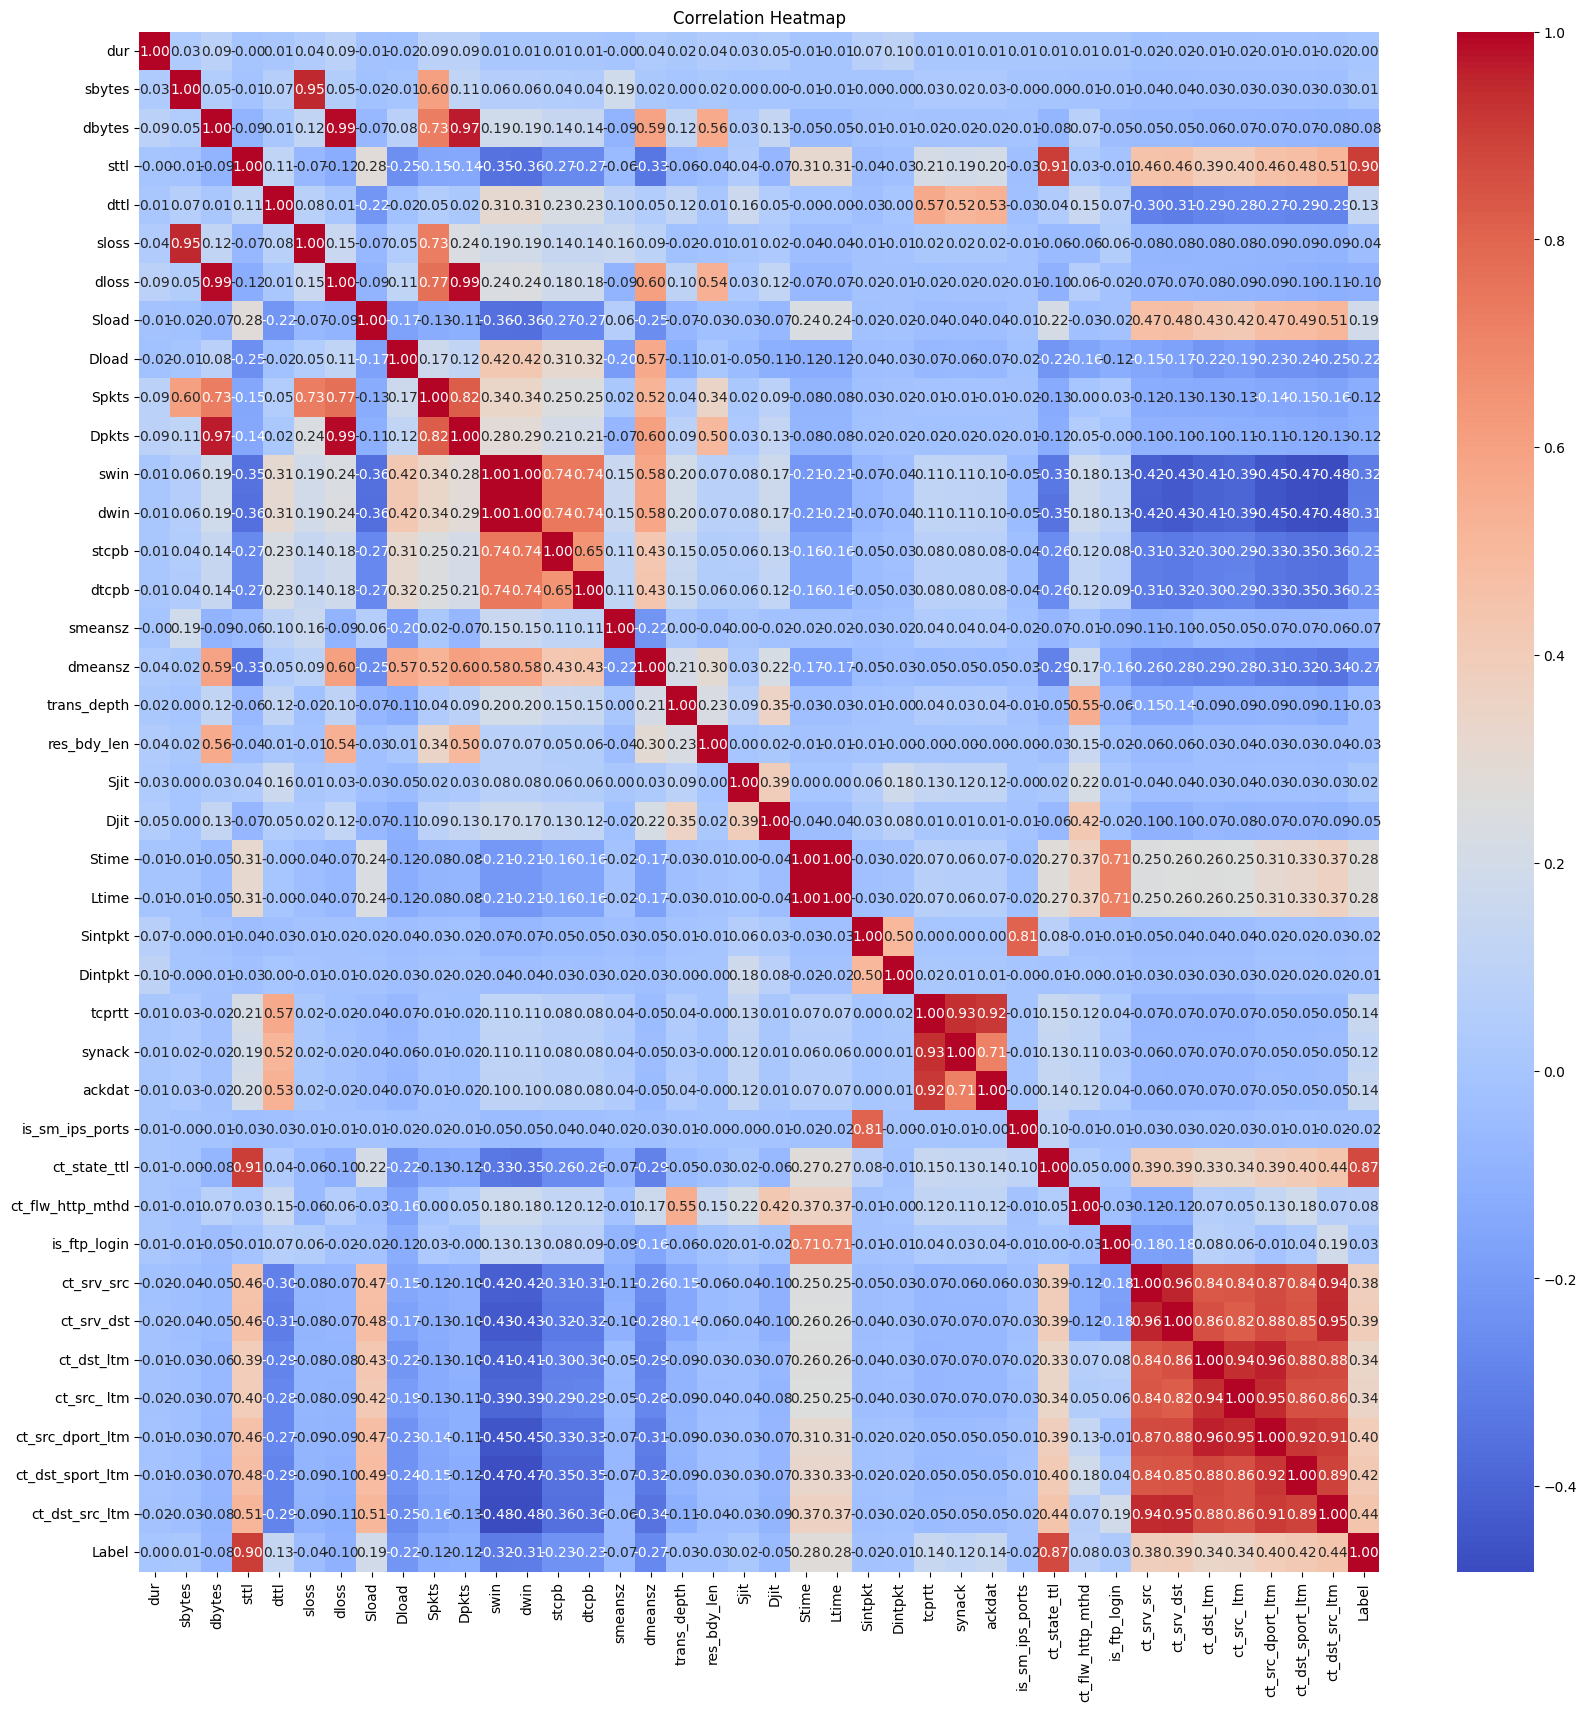

In [ ]:
import seaborn as sns

# Replace 'correlation_features' with the list of numerical features for correlation.
correlation_features = final_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = final_data[correlation_features].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


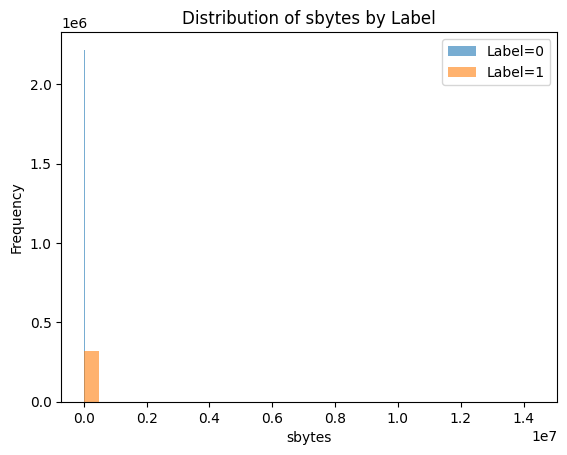

In [ ]:
numerical_feature = 'sbytes'
target_column = 'Label'

for label in final_data[target_column].unique():
    subset = final_data[final_data[target_column] == label]
    subset[numerical_feature].plot(kind='hist', bins=30, alpha=0.6, label=f'{target_column}={label}')

plt.title(f'Distribution of {numerical_feature} by {target_column}')
plt.xlabel(numerical_feature)
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Dropping irrelevant Columns

In [ ]:
final_data = final_data.drop(columns=['srcip', 'sport', 'dstip', 'dsport', 'Stime', 'Ltime'])

In [ ]:
final_data['is_ftp_login'] = final_data['is_ftp_login'].astype(bool)

In [ ]:
final_data['is_sm_ips_ports'] = final_data['is_sm_ips_ports'].astype(bool)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2540047 entries, 0 to 440043
Data columns (total 43 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            int64  
 4   dbytes            int64  
 5   sttl              int64  
 6   dttl              int64  
 7   sloss             int64  
 8   dloss             int64  
 9   service           object 
 10  Sload             float64
 11  Dload             float64
 12  Spkts             int64  
 13  Dpkts             int64  
 14  swin              int64  
 15  dwin              int64  
 16  stcpb             int64  
 17  dtcpb             int64  
 18  smeansz           int64  
 19  dmeansz           int64  
 20  trans_depth       int64  
 21  res_bdy_len       int64  
 22  Sjit              float64
 23  Djit              float64
 24  Sintpkt           float64
 25  Dintpkt           float64
 26  tcprtt            fl

## Encoding

In [ ]:
final_data_encoded = pd.get_dummies(final_data, columns =['proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat'], drop_first=True)

In [ ]:
final_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2540047 entries, 0 to 440043
Columns: 223 entries, dur to attack_cat_Worms
dtypes: bool(187), float64(11), int64(25)
memory usage: 1.1 GB


In [ ]:
final_data_encoded['is_ftp_login'].value_counts()

,count
is_ftp_login,
True,1473454
False,1066593


In [ ]:
#dropping 2.0, 4.0 values
final_data_encoded = final_data_encoded[~final_data_encoded['is_ftp_login'].isin([2.0, 4.0])]

In [ ]:
final_data_encoded['Label'].value_counts()

,count
Label,
0,2218764
1,321283


## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_Standard = StandardScaler()

In [ ]:
boolean_columns = final_data_encoded.select_dtypes(include=['bool'])
numeric_columns = final_data_encoded.select_dtypes(include=['number']).drop(columns=['Label'])

In [ ]:
data_scaled_numeric = pd.DataFrame(scaler_Standard.fit_transform(final_data_encoded[numeric_columns.columns]), columns=numeric_columns.columns)

In [ ]:
data_scaled_numeric.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ackdat,ct_state_ttl,ct_flw_http_mthd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,-0.047234,-0.074595,-0.225105,-0.425902,-0.041232,-0.229334,-0.288533,-0.307375,-0.432928,-0.410163,...,-0.120805,-0.38231,-0.295414,-0.572772,-0.183780,-0.666391,-0.475437,-0.429620,-0.419913,-0.519252
1,-0.044715,-0.067574,-0.224236,-0.425902,-0.041232,-0.229334,-0.288533,-0.310855,-0.568156,-0.383945,...,-0.120805,-0.38231,-0.295414,-0.665051,-0.460981,-0.543872,-0.475437,-0.429620,-0.419913,-0.430429
2,-0.047230,-0.074347,-0.225019,-0.425902,-0.041232,-0.229334,-0.288533,-0.307194,-0.429500,-0.410163,...,-0.120805,-0.38231,-0.295414,0.257735,-0.091380,-0.666391,-0.597313,-0.311662,-0.419913,-0.519252
3,-0.047223,-0.074595,-0.225105,-0.425902,-0.041232,-0.229334,-0.288533,-0.307912,-0.451675,-0.410163,...,-0.120805,-0.38231,-0.295414,-0.295936,0.001020,-0.666391,-0.719189,-0.429620,-0.419913,-0.519252
4,-0.047226,-0.074347,-0.225019,-0.425902,-0.041232,-0.229334,-0.288533,-0.307382,-0.435942,-0.410163,...,-0.120805,-0.38231,-0.295414,-0.203658,0.001020,-0.666391,-0.719189,-0.429620,-0.419913,-0.519252


In [ ]:
final_data_encoded_scaled = pd.concat([data_scaled_numeric.reset_index(drop=True), final_data_encoded[boolean_columns.columns].reset_index(drop=True), final_data_encoded['Label'].reset_index(drop=True)], axis=1)

In [ ]:
#One-hot encoded, scaled(Standardized) data
final_data_encoded_scaled.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_Backdoors,attack_cat_DoS,attack_cat_Exploits,attack_cat_Generic,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms,Label
0,-0.047234,-0.074595,-0.225105,-0.425902,-0.041232,-0.229334,-0.288533,-0.307375,-0.432928,-0.410163,...,False,False,False,False,False,False,False,False,False,0
1,-0.044715,-0.067574,-0.224236,-0.425902,-0.041232,-0.229334,-0.288533,-0.310855,-0.568156,-0.383945,...,False,False,False,False,False,False,False,False,False,0
2,-0.047230,-0.074347,-0.225019,-0.425902,-0.041232,-0.229334,-0.288533,-0.307194,-0.429500,-0.410163,...,False,False,False,False,False,False,False,False,False,0
3,-0.047223,-0.074595,-0.225105,-0.425902,-0.041232,-0.229334,-0.288533,-0.307912,-0.451675,-0.410163,...,False,False,False,False,False,False,False,False,False,0
4,-0.047226,-0.074347,-0.225019,-0.425902,-0.041232,-0.229334,-0.288533,-0.307382,-0.435942,-0.410163,...,False,False,False,False,False,False,False,False,False,0


## Handling Null Values



In [ ]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
final_data_encoded_scaled['Label'].value_counts()

,count
Label,
0,2218764
1,321283


In [ ]:
final_data_encoded_scaled.shape

(2540047, 229)

In [ ]:
final_data_encoded_scaled['ct_flw_http_mthd'].value_counts()

,count
ct_flw_http_mthd,
-0.295414,986791
0.963886,188008
7.260386,7902
4.741786,6564
3.482486,738
2.223186,588
6.001086,430
11.038285,270
17.334784,224


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'final_data_encoded' and the target is 'is_attack'
correlation_matrix = final_data_encoded.corr()

# Display correlation with the target variable
print(correlation_matrix['Label'].sort_values(ascending=False))

Label                 1.000000
sttl                  0.904393
ct_state_ttl          0.873694
attack_cat_Generic    0.800102
state_INT             0.595858
                        ...   
dmeansz              -0.272397
state_FIN            -0.310056
dwin                 -0.313920
swin                 -0.315108
proto_tcp            -0.315120
Name: Label, Length: 223, dtype: float64


In [ ]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
final_data_encoded_scaled.isna().sum()

,0
dur,0
sbytes,0
dbytes,0
sttl,0
dttl,0
sloss,0
dloss,0
Sload,0
Dload,0
Spkts,0


In [ ]:
correlation_score = final_data_encoded['is_ftp_login'].corr(final_data_encoded['Label'])
correlation_score

0.2705608471406807

Dropping due to low correlation

In [ ]:
correlation_score = final_data_encoded['ct_flw_http_mthd'].corr(final_data_encoded['Label'])
correlation_score

0.08318755523845077

In [ ]:
final_data_encoded_scaled.drop(columns=['ct_flw_http_mthd'], inplace=True)

In [ ]:
final_data_encoded_scaled.isna().sum()

,0
dur,0
sbytes,0
dbytes,0
sttl,0
dttl,0
sloss,0
dloss,0
Sload,0
Dload,0
Spkts,0


## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = final_data_encoded_scaled.drop('Label', axis=1)
y = final_data_encoded_scaled['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
final_data_encoded_scaled['Label'].value_counts()

,count
Label,
0,2218764
1,321283


## SMOTE(Oversampling)

In [ ]:
# Create a SMOTE object
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print(f"Original training set shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled training set shape: {X_train_resampled.shape}, {y_train_resampled.shape}")

Original training set shape: (2032037, 227), (2032037,)
Resampled training set shape: (3550022, 227), (3550022,)


In [ ]:
y_train_resampled_df = pd.Series(y_train_resampled)
print(y_train_resampled_df.value_counts())

Label
0    1775011
1    1775011
Name: count, dtype: int64


# ***RandomForest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    443753
           1       0.99      1.00      1.00     64257

    accuracy                           1.00    508010
   macro avg       1.00      1.00      1.00    508010
weighted avg       1.00      1.00      1.00    508010



In [ ]:
# Print confusion matrix
conf_matrix_Rndm_Frst = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_Rndm_Frst)

Confusion Matrix:
[[443340    413]
 [    97  64160]]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9989960827542765


# ***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Fit the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    443753
           1       0.99      1.00      0.99     64257

    accuracy                           1.00    508010
   macro avg       0.99      1.00      1.00    508010
weighted avg       1.00      1.00      1.00    508010



In [ ]:
#Print COnfusion Matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))

Confusion Matrix for Logistic Regression:
[[443093    660]
 [    13  64244]]


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Accuracy: 0.9986752229286825


# ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model
decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    443753
           1       1.00      1.00      1.00     64257

    accuracy                           1.00    508010
   macro avg       1.00      1.00      1.00    508010
weighted avg       1.00      1.00      1.00    508010



In [ ]:
#Print COnfusion Matrix
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_tree))

Confusion Matrix for Decision Tree:
[[443490    263]
 [   220  64037]]


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

Accuracy: 0.9990492313143442


# ***Gradient Booosting***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model
gb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

#Print Confusion Matrix
print("Confusion Matrix for Gradient Boost:")
print(confusion_matrix(y_test, y_pred_gb))

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize the Gradient Boosting Classifier with optimizations
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,         # Number of boosting stages to be run
    learning_rate=0.1,        # Step size shrinkage
    max_depth=5,              # Maximum depth of the individual trees
    min_samples_split=2,      # Minimum number of samples required to split an internal node
    min_samples_leaf=1,       # Minimum number of samples required to be at a leaf node
    subsample=0.8,            # Fraction of samples used for fitting individual base learners
    max_features='sqrt',      # Number of features to consider when looking for the best split
    random_state=42
)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    443753
           1       1.00      0.99      0.99     64257

    accuracy                           1.00    508010
   macro avg       1.00      1.00      1.00    508010
weighted avg       1.00      1.00      1.00    508010

Accuracy: 0.9985354619003562


# ***XGBoost (Best Model Yet)***

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
import pandas as pd #Import pandas

xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)  # Use n_jobs=-1 to use all available cores
#Convert X_train_resampled to a numpy array
xgb_model.fit(X_train_resampled.to_numpy(), y_train_resampled) #Use .to_numpy() to convert DataFrame to NumPy array

y_pred_xgb = xgb_model.predict(X_test.to_numpy()) #also convert X_test

#Evaluate the Model
print(classification_report(y_test, y_pred_xgb))

#Print Confusion Matrix
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    443753
           1       1.00      1.00      1.00     64257

    accuracy                           1.00    508010
   macro avg       1.00      1.00      1.00    508010
weighted avg       1.00      1.00      1.00    508010

Confusion Matrix for XGBoost:
[[443443    310]
 [    71  64186]]


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Accuracy: 0.999250014763489


In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Sample data
# X_train, y_train should be your training data and labels
# X_train, y_train = ...

# Define the parameter distribution
param_dist = {
    'max_depth': np.arange(3, 10, 1),  # Values from 3 to 9
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Different learning rates
    'n_estimators': np.arange(100, 501, 100),  # 100, 200, 300, 400, 500
    'subsample': [0.6, 0.7, 0.8, 0.9],  # Fraction of samples
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],  # Fraction of features
    'gamma': np.arange(0, 1, 0.1)  # Values from 0 to 0.9
}

# Create an XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations to sample
    scoring='roc_auc',  # Metric to optimize
    cv=3,  # Number of cross-validation folds
    verbose=1,  # Print progress
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Convert X_train_resampled to a NumPy array before fitting
X_train_resampled_np = X_train_resampled.to_numpy()

# Fit the RandomizedSearchCV using the NumPy array
random_search.fit(X_train_resampled_np, y_train_resampled)

# Get the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best ROC AUC score: ", random_search.best_score_)

# Optionally, evaluate on test data
# y_pred = random_search.predict(X_test)
# print("Test ROC AUC score: ", roc_auc_score(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


# ***CatBoost***

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
import pandas as pd

# Create a new DataFrame without duplicate columns
X_train_resampled_no_duplicates = X_train_resampled.loc[:, ~X_train_resampled.columns.duplicated()]
X_test_no_duplicates = X_test.loc[:, ~X_test.columns.duplicated()]  # Apply to X_test as well

# Now you can train the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=100)
catboost_model.fit(X_train_resampled_no_duplicates, y_train_resampled)

y_pred_catboost = catboost_model.predict(X_test_no_duplicates)

# ... (rest of your code)
#Evaluate the model
print(classification_report(y_test, y_pred_catboost))

#Print Confusion Matrix
print("Confusion Matrix for CatBoost:")
print(confusion_matrix(y_test, y_pred_catboost))

Learning rate set to 0.337974
0:	learn: 0.0925359	total: 170ms	remaining: 2m 49s
100:	learn: 0.0017381	total: 8.44s	remaining: 1m 15s
200:	learn: 0.0017380	total: 16.4s	remaining: 1m 5s
300:	learn: 0.0017380	total: 24.2s	remaining: 56.3s
400:	learn: 0.0017380	total: 32.1s	remaining: 48s
500:	learn: 0.0017380	total: 40.1s	remaining: 39.9s
600:	learn: 0.0017380	total: 47.9s	remaining: 31.8s
700:	learn: 0.0017380	total: 55.8s	remaining: 23.8s
800:	learn: 0.0017380	total: 1m 3s	remaining: 15.8s
900:	learn: 0.0017380	total: 1m 11s	remaining: 7.87s
999:	learn: 0.0017380	total: 1m 19s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    443753
           1       0.99      1.00      1.00     64257

    accuracy                           1.00    508010
   macro avg       1.00      1.00      1.00    508010
weighted avg       1.00      1.00      1.00    508010

Confusion Matrix for CatBoost:
[[443255    498]
 [    48  64209]]


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_catboost))

Accuracy: 0.9989252180075195
